# Liver Disease Comparative Study

In [4]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [5]:
#Read the training & test data
liver_df = pd.read_csv(r'D:\ASUS\Resume Project\Liver Disease\indian_liver_patient.csv')



In [6]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [9]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [10]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# Statistical Testing (T-test & Chi-square Test)
# We'll use T-tests to compare means of two groups (liver disease vs no liver disease) for numerical features and a Chi-square test for categorical variables like gender.

In [11]:
from scipy.stats import ttest_ind

# Separate the data based on liver disease
liver_disease = liver_df[liver_df['Dataset'] == 1]
no_liver_disease = liver_df[liver_df['Dataset'] == 2]

# Perform T-test for Total_Bilirubin
t_stat, p_value = ttest_ind(liver_disease['Total_Bilirubin'], no_liver_disease['Total_Bilirubin'])
print(f"T-test statistic for Total_Bilirubin: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in Total Bilirubin levels between liver disease and no liver disease groups.")
else:
    print("There is no significant difference in Total Bilirubin levels between liver disease and no liver disease groups.")

T-test statistic for Total_Bilirubin: 5.441441126834863, P-value: 7.801430929364345e-08
There is a significant difference in Total Bilirubin levels between liver disease and no liver disease groups.


In [12]:
from scipy.stats import chi2_contingency

# Create a contingency table for Gender vs Dataset
contingency_table = pd.crosstab(liver_df['Gender'], liver_df['Dataset'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between Gender and Liver Disease.")
else:
    print("There is no significant relationship between Gender and Liver Disease.")

Chi-square statistic: 3.5466486106706046, P-value: 0.059665846857774464
There is no significant relationship between Gender and Liver Disease.


In [13]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Check for Class Imbalance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\2112958435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=liver_df['Dataset'], palette='viridis')


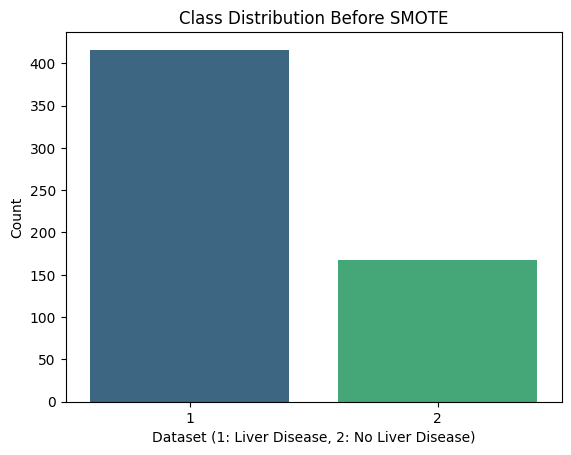

Number of patients diagnosed with liver disease: 416
Number of patients not diagnosed with liver disease: 167


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for class distribution
sns.countplot(x=liver_df['Dataset'], palette='viridis')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Dataset (1: Liver Disease, 2: No Liver Disease)")
plt.ylabel("Count")
plt.show()

# Print the class distribution
LD, NLD = liver_df['Dataset'].value_counts()
print(f'Number of patients diagnosed with liver disease: {LD}')
print(f'Number of patients not diagnosed with liver disease: {NLD}')

# Handling Imbalanced Dataset using SMOTE

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\2010188553.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


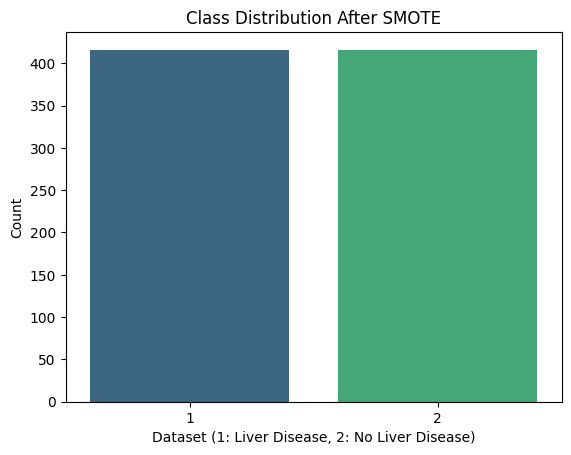

Number of patients diagnosed with liver disease after SMOTE: 416
Number of patients not diagnosed with liver disease after SMOTE: 416


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = liver_df.drop(['Gender', 'Dataset'], axis=1)  # Drop categorical and target columns
y = liver_df['Dataset']  # Target variable

# Handle missing values using SimpleImputer (mean imputation)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Auto balances both classes
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Check the new class distribution
sns.countplot(x=y_resampled, palette='viridis')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Dataset (1: Liver Disease, 2: No Liver Disease)")
plt.ylabel("Count")
plt.show()

# Print the new class distribution
LD_resampled, NLD_resampled = y_resampled.value_counts()
print(f'Number of patients diagnosed with liver disease after SMOTE: {LD_resampled}')
print(f'Number of patients not diagnosed with liver disease after SMOTE: {NLD_resampled}')

# Data Visualisation

In [16]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
3,2,Male,117
2,2,Female,50
1,1,Male,324
0,1,Female,92


In [17]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
3,2,Male,40.598291
2,2,Female,42.740000
1,1,Male,46.950617
0,1,Female,43.347826


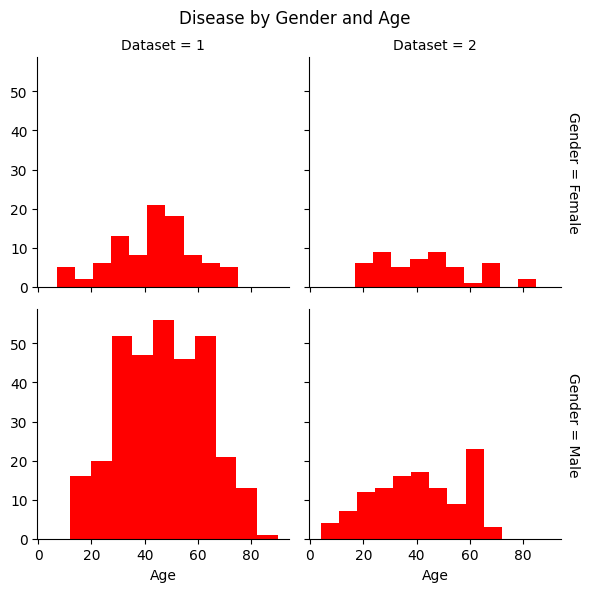

In [18]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

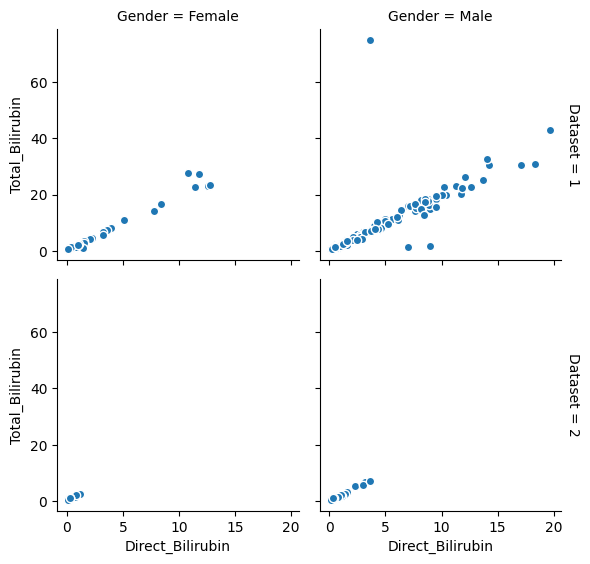

In [19]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)


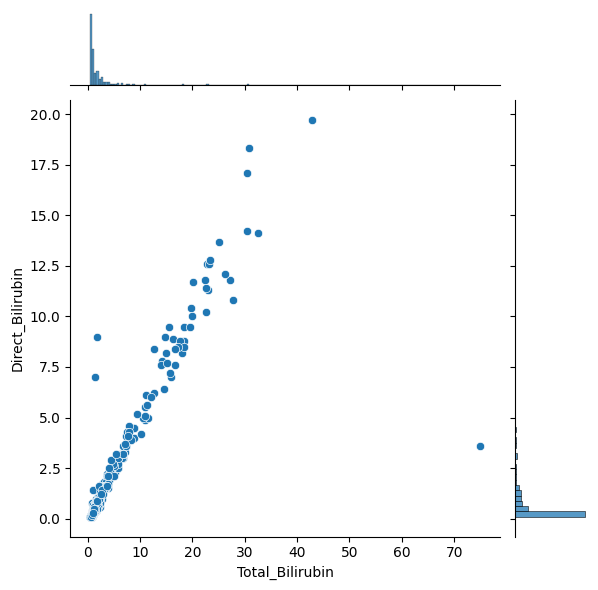

In [20]:
sns.jointplot(data=liver_df, x="Total_Bilirubin", y="Direct_Bilirubin", kind="scatter")

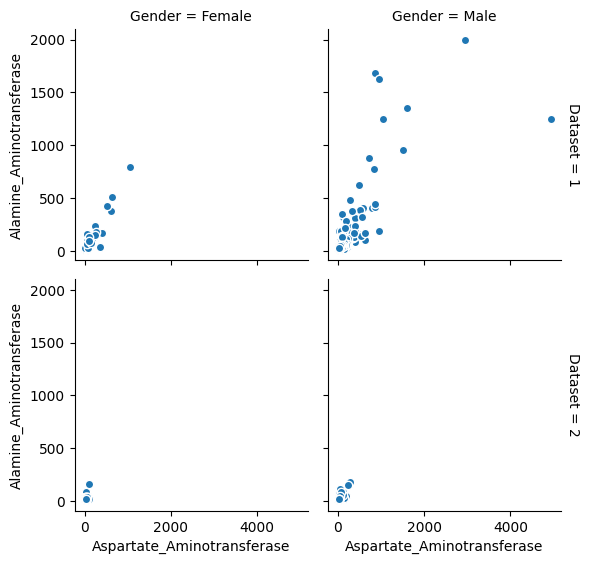

In [21]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

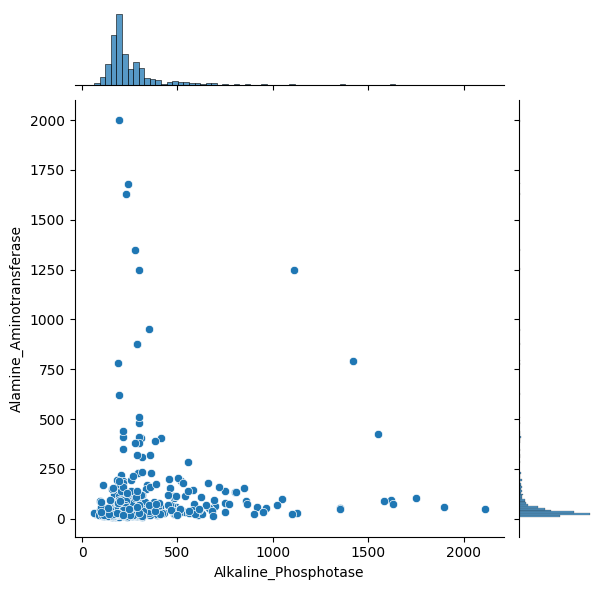

In [22]:
sns.jointplot(data=liver_df, x="Alkaline_Phosphotase", y="Alamine_Aminotransferase", kind="scatter")

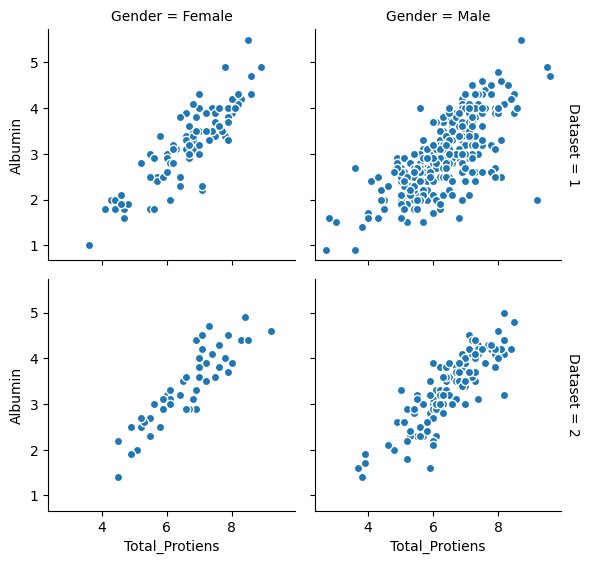

In [23]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

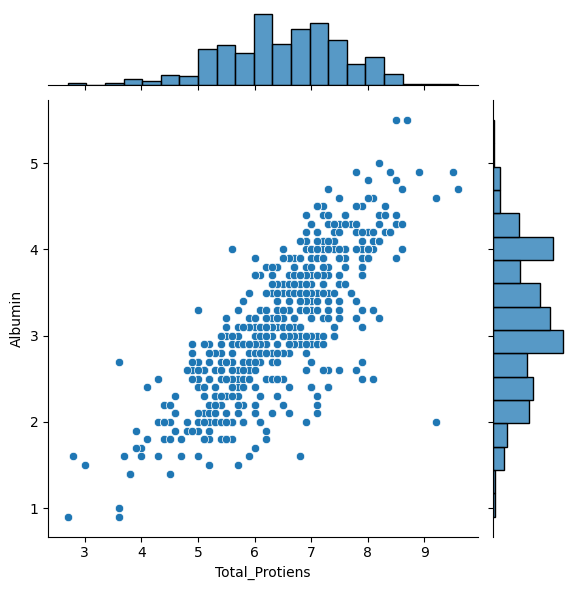

In [24]:
sns.jointplot(data=liver_df, x="Total_Protiens", y="Albumin", kind="scatter")

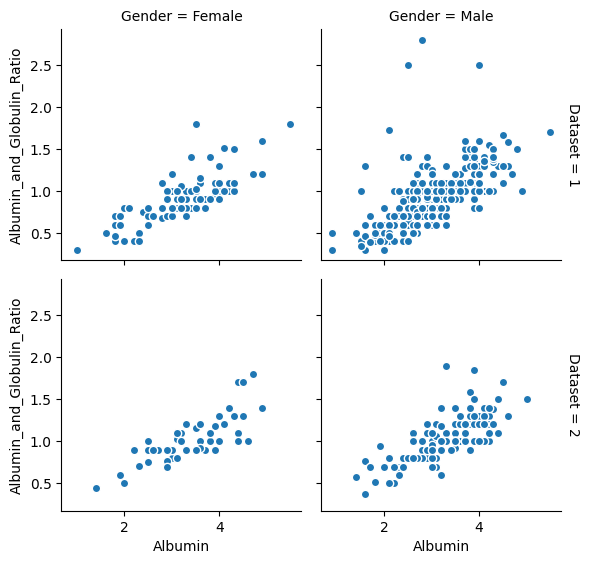

In [25]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

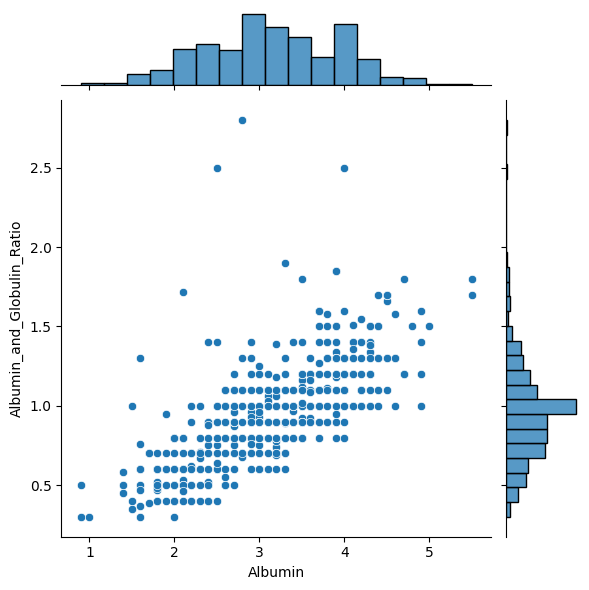

In [26]:
sns.jointplot(data=liver_df, x="Albumin", y="Albumin_and_Globulin_Ratio", kind="scatter")

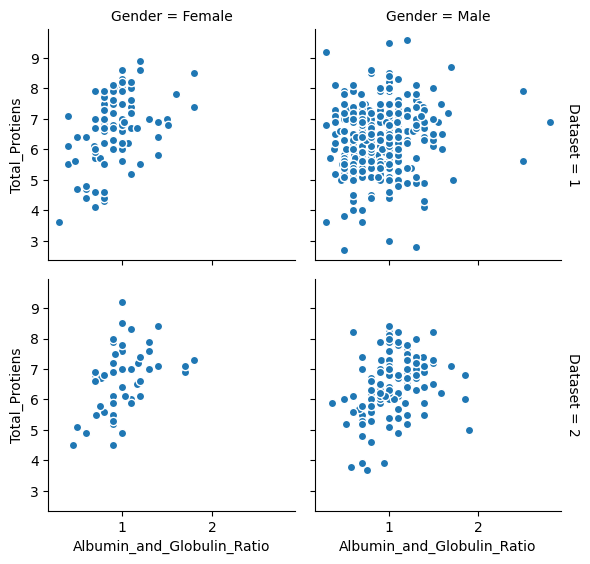

In [27]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

# Observation

From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin
Aspartate_Aminotransferase & Alamine_Aminotransferase
Total_Protiens & Albumin
Albumin_and_Globulin_Ratio & Albumin

In [28]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


# One Hot Encpding : Convert categorical variable "Gender" to indicator variables

In [29]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


In [30]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [31]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,True,False
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,False,True
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,False,True
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,False,True
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,False,True


In [32]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [33]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,True,False
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,False,True
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,True,False
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,False,True


In [34]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [35]:
X = liver_df.drop(['Gender','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,True,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,False,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,False,True


# PCA

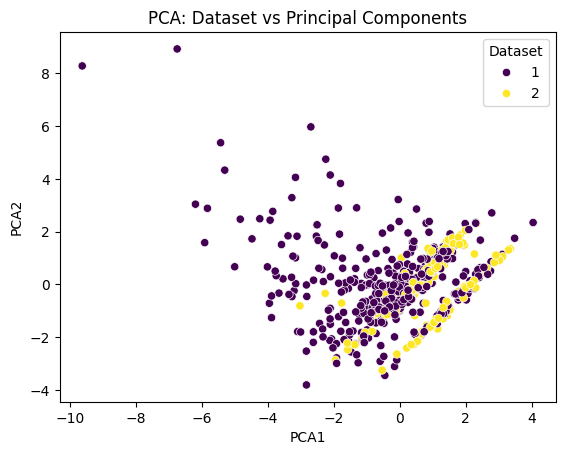

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled) 
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Dataset'] = liver_df['Dataset']  # Add back the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='PCA1', y='PCA2', hue='Dataset', data=pca_df, palette='viridis')
plt.title('PCA: Dataset vs Principal Components')
plt.show()


In [37]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X is your training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the PCA model
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)


In [38]:
y = liver_df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [39]:
# Correlation
liver_corr = X.corr()

In [40]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


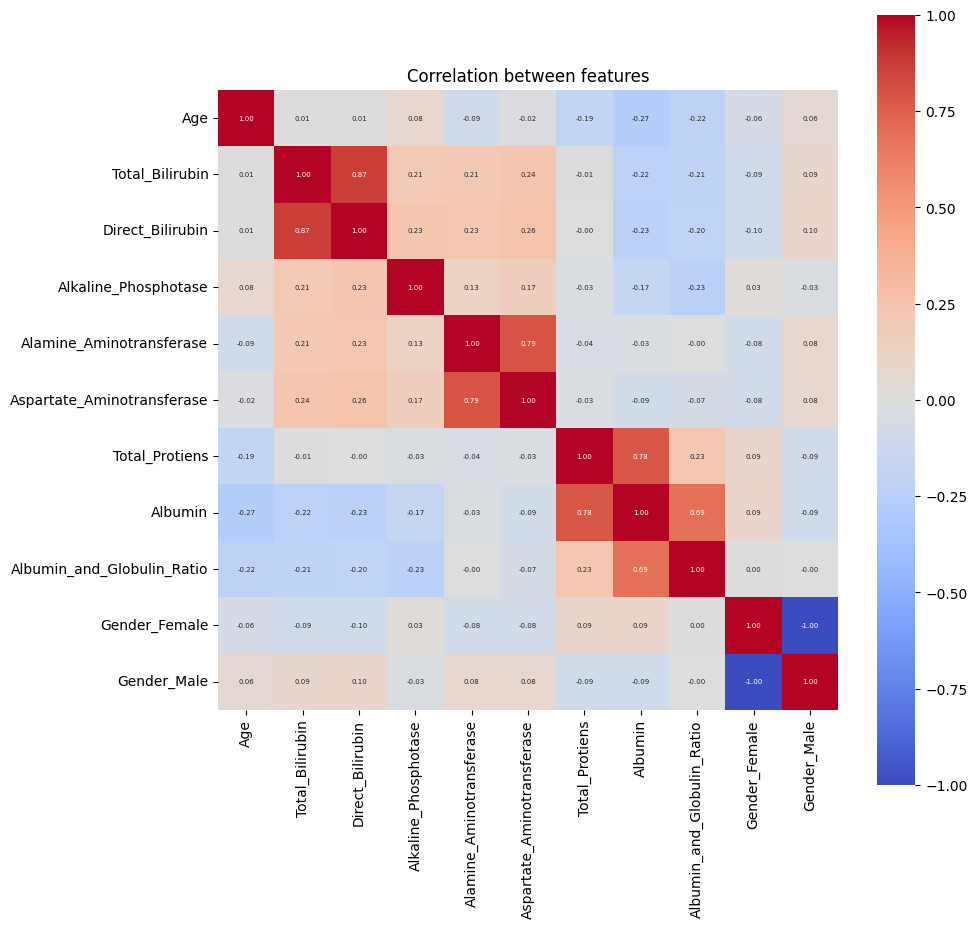

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           cmap= 'coolwarm')
plt.title('Correlation between features');


# Machine Learning

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


# Hyperparameter Tuning Function by Optuna and Model Creation

[I 2025-01-31 22:51:46,291] A new study created in memory with name: no-name-c976a704-eb7f-404b-81f9-80cb2dd41b02
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\590542740.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-4, 1e2),
[I 2025-01-31 22:51:46,303] Trial 0 finished with value: 0.6914285714285714 and parameters: {'C': 0.028465725482119588, 'solver': 'liblinear'}. Best is trial 0 with value: 0.6914285714285714.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\590542740.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-4, 1e2),
[I 2025-01-31 22:51:46,310] Trial 1 finished with valu

Logistic Regression Training Score: 
 73.28
Logistic Regression Test Score: 
 73.14
Accuracy: 
 0.7314285714285714
Confusion Matrix: 
 [[115   9]
 [ 38  13]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.93      0.83       124
           2       0.59      0.25      0.36        51

    accuracy                           0.73       175
   macro avg       0.67      0.59      0.59       175
weighted avg       0.70      0.73      0.69       175



<Axes: >

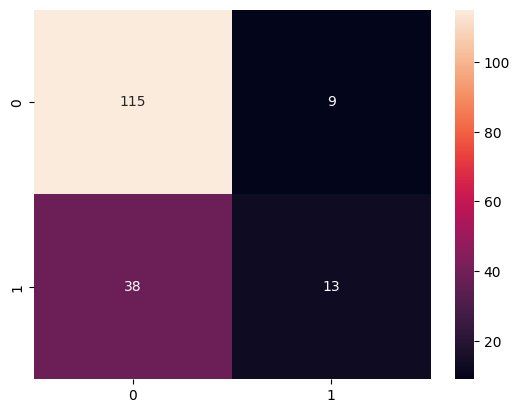

In [44]:
#1) Logistic Regression
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameter search space for Logistic Regression
logreg_param_distributions = {
    'C': [1e-4, 1e2],  # Regularization strength (log scale)
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Define the objective function for Optuna
def objective_logreg(trial):
    params = {
        'C': trial.suggest_loguniform('C', 1e-4, 1e2),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])
    }
    logreg = LogisticRegression(**params)
    logreg.fit(X_train, y_train)
    return logreg.score(X_test, y_test)

# Create Optuna study for Logistic Regression
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(objective_logreg, n_trials=50)

# Get the best parameters and train the model
best_logreg_params = study_logreg.best_params
logreg_best_model = LogisticRegression(**best_logreg_params)
logreg_best_model.fit(X_train, y_train)

# Predict Output
log_predicted = logreg_best_model.predict(X_test)

# Model Performance
logreg_score = round(logreg_best_model.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg_best_model.score(X_test, y_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y_test, log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, log_predicted))
print('Classification Report: \n', classification_report(y_test, log_predicted))

sns.heatmap(confusion_matrix(y_test, log_predicted), annot=True, fmt="d")


Gaussian Naive Bayes Training Score: 
 56.13
Gaussian Naive Bayes Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
Confusion Matrix: 
 [[44 80]
 [ 2 49]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.35      0.52       124
           2       0.38      0.96      0.54        51

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



<Axes: >

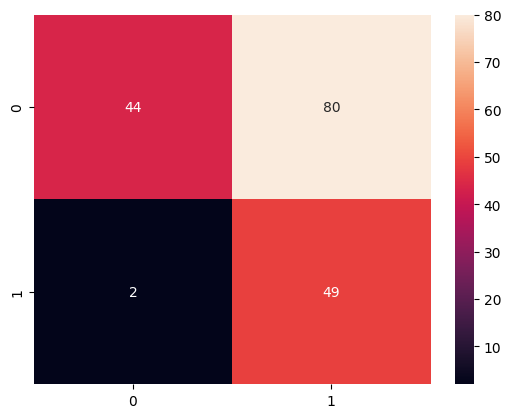

In [45]:
#2) Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Hyperparameter search space for Gaussian Naive Bayes (no major hyperparameters)
gnb_param_distributions = {}

# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict Output
gnb_predicted = gnb.predict(X_test)

# Model Performance
gnb_score = round(gnb.score(X_train, y_train) * 100, 2)
gnb_score_test = round(gnb.score(X_test, y_test) * 100, 2)

print('Gaussian Naive Bayes Training Score: \n', gnb_score)
print('Gaussian Naive Bayes Test Score: \n', gnb_score_test)
print('Accuracy: \n', accuracy_score(y_test, gnb_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, gnb_predicted))
print('Classification Report: \n', classification_report(y_test, gnb_predicted))

sns.heatmap(confusion_matrix(y_test, gnb_predicted), annot=True, fmt="d")


[I 2025-01-31 22:51:47,466] A new study created in memory with name: no-name-85ec74fc-9724-4859-9a0b-63e00b6bbf95
[I 2025-01-31 22:51:47,699] Trial 0 finished with value: 0.6628571428571428 and parameters: {'n_estimators': 185, 'max_depth': 35, 'min_samples_split': 10}. Best is trial 0 with value: 0.6628571428571428.
[I 2025-01-31 22:51:47,841] Trial 1 finished with value: 0.68 and parameters: {'n_estimators': 120, 'max_depth': 6, 'min_samples_split': 8}. Best is trial 1 with value: 0.68.
[I 2025-01-31 22:51:48,079] Trial 2 finished with value: 0.6914285714285714 and parameters: {'n_estimators': 193, 'max_depth': 23, 'min_samples_split': 7}. Best is trial 2 with value: 0.6914285714285714.
[I 2025-01-31 22:51:48,143] Trial 3 finished with value: 0.7371428571428571 and parameters: {'n_estimators': 47, 'max_depth': 35, 'min_samples_split': 3}. Best is trial 3 with value: 0.7371428571428571.
[I 2025-01-31 22:51:48,192] Trial 4 finished with value: 0.6742857142857143 and parameters: {'n_est

Random Forest Training Score: 
 100.0
Random Forest Test Score: 
 65.71
Accuracy: 
 0.6571428571428571
Confusion Matrix: 
 [[100  24]
 [ 36  15]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.74      0.81      0.77       124
           2       0.38      0.29      0.33        51

    accuracy                           0.66       175
   macro avg       0.56      0.55      0.55       175
weighted avg       0.63      0.66      0.64       175



<Axes: >

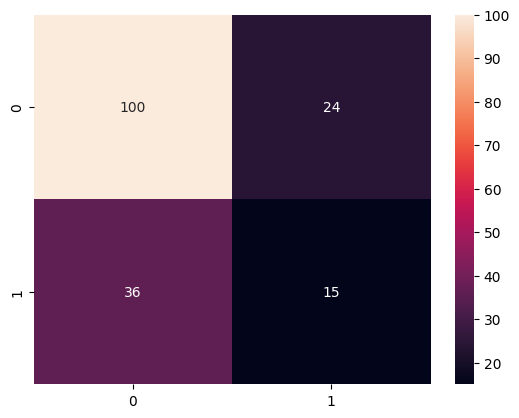

In [46]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter search space for Random Forest
rf_param_distributions = {
    'n_estimators': [10, 200],  # Number of trees
    'max_depth': [5, 50],  # Depth of trees
    'min_samples_split': [2, 10]  # Minimum samples to split
}

# Define the objective function for Optuna
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
    }
    rf = RandomForestClassifier(**params)
    rf.fit(X_train, y_train)
    return rf.score(X_test, y_test)

# Create Optuna study for Random Forest
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Get the best parameters and train the model
best_rf_params = study_rf.best_params
rf_best_model = RandomForestClassifier(**best_rf_params)
rf_best_model.fit(X_train, y_train)

# Predict Output
rf_predicted = rf_best_model.predict(X_test)

# Model Performance
rf_score = round(rf_best_model.score(X_train, y_train) * 100, 2)
rf_score_test = round(rf_best_model.score(X_test, y_test) * 100, 2)

print('Random Forest Training Score: \n', rf_score)
print('Random Forest Test Score: \n', rf_score_test)
print('Accuracy: \n', accuracy_score(y_test, rf_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_predicted))
print('Classification Report: \n', classification_report(y_test, rf_predicted))

sns.heatmap(confusion_matrix(y_test, rf_predicted), annot=True, fmt="d")


[I 2025-01-31 22:51:52,197] A new study created in memory with name: no-name-73bfbeef-a4f0-448f-b885-9c820d7e6899
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\1595889602.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),
[I 2025-01-31 22:52:02,363] Trial 0 finished with value: 0.7085714285714285 and parameters: {'C': 5.518046528599683, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 0.7085714285714285.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\1595889602.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),
[I 2025-01-31 22:52:02,384] Trial 1 finished 

SVM Training Score: 
 100.0
SVM Test Score: 
 72.57
Accuracy: 
 0.7257142857142858
Confusion Matrix: 
 [[124   0]
 [ 48   3]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      1.00      0.84       124
           2       1.00      0.06      0.11        51

    accuracy                           0.73       175
   macro avg       0.86      0.53      0.47       175
weighted avg       0.80      0.73      0.63       175



<Axes: >

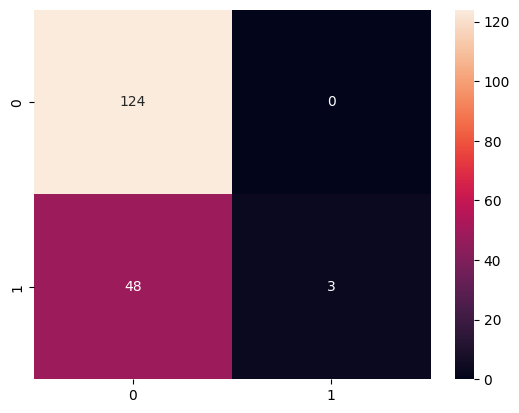

In [47]:
#4)SVM

from sklearn.svm import SVC

# Hyperparameter search space for SVM
svm_param_distributions = {
    'C': [0.1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Define the objective function for Optuna
def objective_svm(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.1, 10),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
    }
    svm = SVC(**params)
    svm.fit(X_train, y_train)
    return svm.score(X_test, y_test)

# Create Optuna study for SVM
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Get the best parameters and train the model
best_svm_params = study_svm.best_params
svm_best_model = SVC(**best_svm_params)
svm_best_model.fit(X_train, y_train)

# Predict Output
svm_predicted = svm_best_model.predict(X_test)

# Model Performance
svm_score = round(svm_best_model.score(X_train, y_train) * 100, 2)
svm_score_test = round(svm_best_model.score(X_test, y_test) * 100, 2)

print('SVM Training Score: \n', svm_score)
print('SVM Test Score: \n', svm_score_test)
print('Accuracy: \n', accuracy_score(y_test, svm_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, svm_predicted))
print('Classification Report: \n', classification_report(y_test, svm_predicted))

sns.heatmap(confusion_matrix(y_test, svm_predicted), annot=True, fmt="d")


[I 2025-01-31 22:53:10,501] A new study created in memory with name: no-name-278d85e0-fb12-4a12-b6e7-afa322d5a785
[I 2025-01-31 22:53:10,511] Trial 0 finished with value: 0.6628571428571428 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.6628571428571428.
[I 2025-01-31 22:53:10,518] Trial 1 finished with value: 0.6571428571428571 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.6628571428571428.
[I 2025-01-31 22:53:10,529] Trial 2 finished with value: 0.6857142857142857 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 2 with value: 0.6857142857142857.
[I 2025-01-31 22:53:10,537] Trial 3 finished with value: 0.6571428571428571 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.6857142857142857.
[I 2025-01-31 22:53:10,547] Trial 4 finished with value: 0.6514

KNN Training Score: 
 80.88
KNN Test Score: 
 72.57
Accuracy: 
 0.7257142857142858
Confusion Matrix: 
 [[117   7]
 [ 41  10]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.74      0.94      0.83       124
           2       0.59      0.20      0.29        51

    accuracy                           0.73       175
   macro avg       0.66      0.57      0.56       175
weighted avg       0.70      0.73      0.67       175



<Axes: >

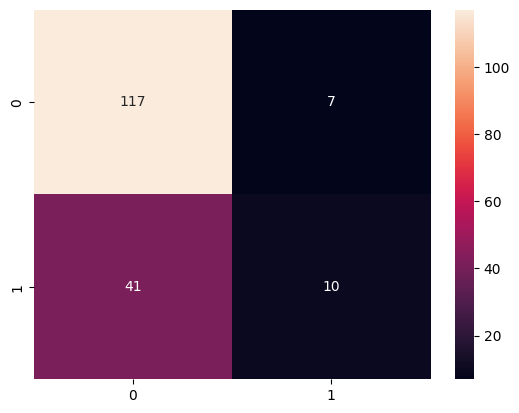

In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter search space for KNN
knn_param_distributions = {
    'n_neighbors': [1, 20],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Define the objective function for Optuna
def objective_knn(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan'])
    }
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)

# Create Optuna study for KNN
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Get the best parameters and train the model
best_knn_params = study_knn.best_params
knn_best_model = KNeighborsClassifier(**best_knn_params)
knn_best_model.fit(X_train, y_train)

# Predict Output
knn_predicted = knn_best_model.predict(X_test)

# Model Performance
knn_score = round(knn_best_model.score(X_train, y_train) * 100, 2)
knn_score_test = round(knn_best_model.score(X_test, y_test) * 100, 2)

print('KNN Training Score: \n', knn_score)
print('KNN Test Score: \n', knn_score_test)
print('Accuracy: \n', accuracy_score(y_test, knn_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, knn_predicted))
print('Classification Report: \n', classification_report(y_test, knn_predicted))

sns.heatmap(confusion_matrix(y_test, knn_predicted), annot=True, fmt="d")











# Model evaluation

In [49]:
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','SVM','KNN'],
    'Score': [ logreg_score, gnb_score, rf_score,svm_score,knn_score],
    'Test Score': [ logreg_score_test, gnb_score_test, rf_score_test,svm_score_test,knn_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,73.28,73.14
4,KNN,80.88,72.57
3,SVM,100.00,72.57
2,Random Forest,100.00,65.71
1,Gaussian Naive Bayes,56.13,53.14


In [50]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [51]:
xtr=X_train.copy()
xts=X_test.copy()
ytr=y_train.copy()
yts=y_test.copy()

D:\ASUS\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ASUS\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ASU

                 MLA Name                                     MLA Parameters  \
3                     SVC  {'C': 1.0, 'break_ties': False, 'cache_size': ...   
0      LogisticRegression  {'C': 1.0, 'class_weight': None, 'dual': False...   
4  RandomForestClassifier  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   
2    KNeighborsClassifier  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
1              GaussianNB           {'priors': None, 'var_smoothing': 1e-09}   

  MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Test Accuracy 3*STD  \
3                0.706557               0.726016                0.109104   
0                0.735246               0.710569                0.093323   
4                     1.0               0.708943                0.107317   
2                   0.775               0.682927                0.107428   
1                0.584016               0.572358                0.090737   

  MLA Fit Time MLA Score Time  
3     0.008905       0.002902 

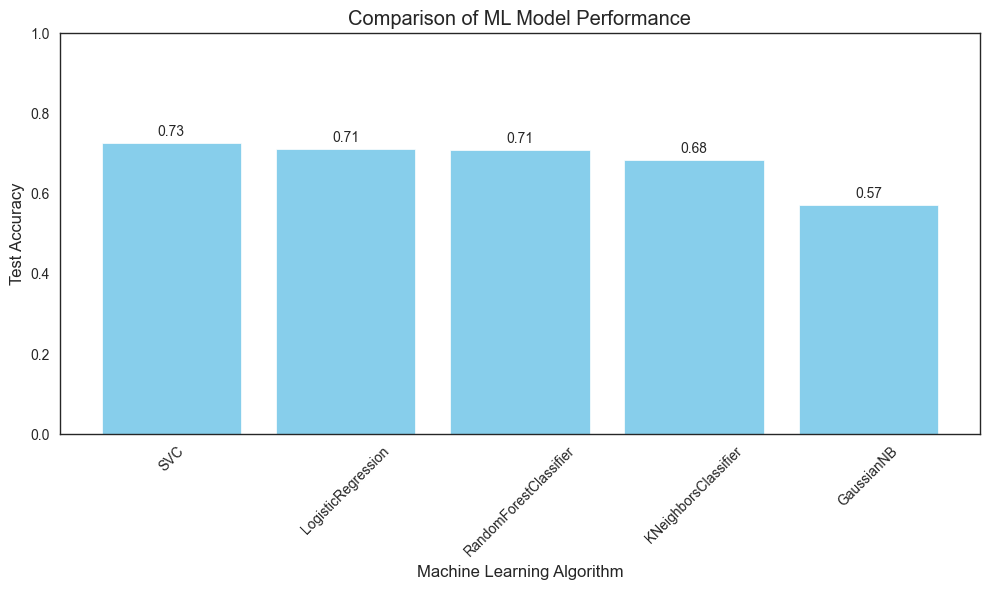

In [52]:
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define a list of machine learning algorithms (MLA)
MLA = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(probability=True),
    RandomForestClassifier(),
]

# Create a DataFrame to store the results
MLA_columns = [
    'MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 
    'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Fit Time', 'MLA Score Time'
]
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Define the cross-validation split
cv_split = ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.6, random_state=0)

# Initialize row index
row_index = 0

# Loop through each algorithm
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross-validation
    cv_results = cross_validate(alg, X_train, y_train, cv=cv_split, return_train_score=True, return_estimator=True)
    
    MLA_compare.loc[row_index, 'MLA Fit Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Score Time'] = cv_results['score_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3
    
    row_index += 1

# Sort the results by test accuracy mean in descending order
MLA_compare.sort_values(by='MLA Test Accuracy Mean', ascending=False, inplace=True)

# Display the table
print(MLA_compare)

# You can further visualize the table using a bar chart for comparison
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(MLA_compare['MLA Name'], MLA_compare['MLA Test Accuracy Mean'], color='skyblue')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Test Accuracy')
plt.title('Comparison of ML Model Performance')
plt.ylim([0, 1.0])  # Set the y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the accuracy scores on top of the bars
for i, v in enumerate(MLA_compare['MLA Test Accuracy Mean']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()



# Conclusion

 Based on the results, RandomForestClassifier achieved the highest Train Accuracy Mean (99.96%) but had a lower Test Accuracy Mean (71.30%), indicating potential overfitting. SVC and LogisticRegression had reasonably balanced performance, with SVC slightly outperforming the others on test accuracy (72.60%). KNeighborsClassifier performed moderately well on both train and test sets, while GaussianNB showed the lowest performance in terms of both training and testing accuracy.

In conclusion, SVC seems to be the most effective model for this dataset, while RandomForestClassifier could benefit from further tuning to reduce overfitting.

# Pickling

In [53]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats

# Assuming your models are already trained (logreg_best_model, knn_best_model, etc.)
models = {
    'logreg': logreg_best_model,
    'knn': knn_best_model,
    'svm': svm_best_model,
    'rf': rf_best_model,
    'nb': gnb
}

# Pickling all models
for model_name, model in models.items():
    with open(f'{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Loading all models
loaded_models = {}
for model_name in models.keys():
    with open(f'{model_name}_model.pkl', 'rb') as f:
        loaded_models[model_name] = pickle.load(f)

# Ensure X_test has the same columns as X_train (if X_train is a pandas DataFrame)
# Assuming X_train is your training data in DataFrame form with column names
X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Checking if the shapes of the training and test data match
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Predicting using the loaded models
predictions = {}
for model_name, model in loaded_models.items():
    # Predicting the class labels (1 or 2) using the model
    prediction = model.predict(X_test)
    
    # Finding the most frequent prediction (mode) from the predictions
    mode_result = stats.mode(prediction)
    
    # Handling scalar or array returned by stats.mode
    if isinstance(mode_result.mode, np.ndarray):
        most_frequent_prediction = mode_result.mode[0]  # If mode is an array, get the first element
    else:
        most_frequent_prediction = mode_result.mode  # If it's scalar, use it directly
    
    # Store the most frequent prediction for each model
    predictions[model_name] = [most_frequent_prediction]  # Store the mode in the dictionary as a list

# Print predictions in the required format
print(predictions)

# Sample output for checking the format
# {
#    "knn": [2],
#    "logreg": [2],
#    "nb": [2],
#    "rf": [2],
#    "svm": [1]
# }



Training data shape: (408, 11)
Test data shape: (175, 11)
{'logreg': [np.int64(1)], 'knn': [np.int64(1)], 'svm': [np.int64(1)], 'rf': [np.int64(1)], 'nb': [np.int64(2)]}
